#ShelfMate ResNet18

Este código se utiliza para el entrenamiento de la red neuronal convolucional.

##Entrenamiento

In [1]:
!pip install torch torchvision
!pip install Cython

In [2]:
#montura de drive para transferencia de datos

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#librerías

from torch import nn
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from  torch import optim
from torchvision import transforms, utils, models
from torch.utils.data import DataLoader, random_split
from torchsummary import summary
import matplotlib.pyplot as plt

from collections import OrderedDict
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') #establecemos el uso de gpu disponible, else cpu

In [4]:
#transformaciones de entrenamiento

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

product_pics = datasets.ImageFolder(root='/content/drive/MyDrive/ITESM/IA avanzada VII/B2/B2 Reto/all_p', transform=transform)
#product_pics = datasets.ImageFolder(root='/content/drive/MyDrive/ITESM/IA avanzada VII/B2/Mavericks2/Proyecto/Datos/Productos_gaby', transform=transform)

In [5]:
#fotos ingestadas

print('Fotos totales:', len(product_pics))
print('Shape:',product_pics[0][0].shape)

Fotos totales: 5359
Shape: torch.Size([3, 256, 256])


In [6]:
#clases de clasificación

len(product_pics.classes)
product_pics.classes

['CheetosFlaminHot',
 'CheetosTorciditos',
 'ChipsFuego',
 'ChipsJalapeño',
 'Churrumais',
 'DoritosNachos',
 'FritosLimonYSal',
 'HutNuts',
 'PopKarameladas',
 'Rancheritos',
 'RufflesQueso',
 'Runners',
 'SabritasSal',
 'TakisFuego',
 'TakisOriginal',
 'Tostitos']

In [7]:
#split en train, test y validation

train_size = int(0.7 * len(product_pics)) #proporción de train 70 %
val_size = int(0.15 * len(product_pics)) #validation 15 %
test_size = len(product_pics) - train_size - val_size #validation = train - val = 15 %

train_, val_, test_ = random_split(product_pics, [train_size, val_size, test_size])

print("Train:", len(train_))
print("Validation:", len(val_))
print("Test:", len(test_))

Train: 3751
Validation: 803
Test: 805


In [8]:
batch_size = 64 #tamaño de batch

#generar insatncias de DataLoader

train_data = DataLoader(train_ , batch_size=batch_size, shuffle=True)
val_data = DataLoader(val_ , batch_size=batch_size)
test_data = DataLoader(test_)

In [9]:
#importar modelo preentrenado (transfer learning)

model =  models.resnet18(pretrained=True).to(device) #resnet18
print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 107MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [10]:
#ajuste de capa fullyconnected

num_classes = len(product_pics.classes)
model.fc =  nn.Linear(model.fc.in_features, num_classes) #output correspondiente a número de clases
model.softmax = nn.Softmax(dim=1) #capa Softmax

#función de pérdida, optimizador y tasa de aprendizaje
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)

In [11]:
# reentrenamiento

# model = models.resnet18(pretrained=False)
# num_classes = len(product_pics.classes)
# model.fc =  nn.Linear(model.fc.in_features, num_classes)
# model.softmax = nn.Softmax(dim=1)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.05)

# # pesos preentrenados
# weights_path = '/content/drive/MyDrive/ITESM/IA avanzada VII/B2/B2 Reto/trained_v3.pth'
# checkpoint = torch.load(weights_path, map_location=torch.device('cpu'))
# model.load_state_dict(checkpoint)

In [12]:
for param in model.parameters():
        param.requires_grad = False #bloqueamos capas internas del modelo
for param in model.fc.parameters():
        param.requires_grad = True #se permite el gradiente descendiente sobre la capa FC

In [13]:
model.to(device); #modelo a entorno activo

In [14]:
summary(model, (3, 28, 28)); #resumen de la arquitectura

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 14, 14]           9,408
       BatchNorm2d-2           [-1, 64, 14, 14]             128
              ReLU-3           [-1, 64, 14, 14]               0
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Conv2d-5             [-1, 64, 7, 7]          36,864
       BatchNorm2d-6             [-1, 64, 7, 7]             128
              ReLU-7             [-1, 64, 7, 7]               0
            Conv2d-8             [-1, 64, 7, 7]          36,864
       BatchNorm2d-9             [-1, 64, 7, 7]             128
             ReLU-10             [-1, 64, 7, 7]               0
       BasicBlock-11             [-1, 64, 7, 7]               0
           Conv2d-12             [-1, 64, 7, 7]          36,864
      BatchNorm2d-13             [-1, 64, 7, 7]             128
             ReLU-14             [-1, 6

In [15]:
#Entrenamiento

#early stopping
best_val_loss = float('inf')
patience = 6 #paciencia
counter_early_stop = 0

train_loss = []
val_loss = []
train_acc = []
val_acc = []

epochs = 20 #épocas de entrenamiento

for epoch in range(epochs):
    print("epoch {}/{}".format(epoch + 1, epochs))
    running_loss = 0.0
    running_score = 0.0
    model.train()
    for image, label in train_data:
        image = image.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        # Use the model() method for the forward pass
        y_pred = model(image)
        loss = criterion(y_pred, label)
        loss.backward()
        optimizer.step()
        val, index_ = torch.max(y_pred, axis=1)
        running_score += torch.sum(index_ == label.data).item()
        running_loss += loss.item()

    epoch_score = running_score / len(train_data.dataset)
    epoch_loss = running_loss / len(train_data.dataset)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_score)
    print("Training loss: {}, accuracy: {}".format(epoch_loss, epoch_score))

    with torch.no_grad():
        model.eval()
        running_loss = 0.0
        running_score = 0.0
        for image, label in val_data:
            image = image.to(device)
            label = label.to(device)
            optimizer.zero_grad()
            # Use the model() method for the forward pass
            y_pred = model(image)
            loss = criterion(y_pred, label)
            running_loss += loss.item()

            val, index_ = torch.max(y_pred, axis=1)
            running_score += torch.sum(index_ == label.data).item()

        epoch_score = running_score / len(val_data.dataset)
        epoch_loss = running_loss / len(val_data.dataset)
        val_loss.append(epoch_loss)
        val_acc.append(epoch_score)
        print("Validation loss: {}, accuracy: {}".format(epoch_loss, epoch_score))

        # Check for early stopping
        if epoch_loss < best_val_loss:
            best_val_loss = epoch_loss
            counter_early_stop = 0
        else:
            counter_early_stop += 1
            if counter_early_stop >= patience:
                print("Early stopping")
                break

epoch 1/20
Training loss: 0.25616610197981526, accuracy: 0.42068781658224474
Validation loss: 0.00970497397081938, accuracy: 0.8729763387297634
epoch 2/20
Training loss: 0.004420244284679305, accuracy: 0.924020261263663
Validation loss: 0.0033541593612502253, accuracy: 0.9414694894146949
epoch 3/20
Training loss: 0.0019737965715599676, accuracy: 0.9592108770994402
Validation loss: 0.002819483359790828, accuracy: 0.9464508094645081
epoch 4/20
Training loss: 0.0014814276802392046, accuracy: 0.9656091708877632
Validation loss: 0.0035076678137887607, accuracy: 0.9452054794520548
epoch 5/20
Training loss: 0.0015665841733545692, accuracy: 0.9666755531858171
Validation loss: 0.004522612223292644, accuracy: 0.9402241594022416
epoch 6/20
Training loss: 0.0014300372874127391, accuracy: 0.9666755531858171
Validation loss: 0.002873627088527899, accuracy: 0.9564134495641345
epoch 7/20
Training loss: 0.0009058852582202613, accuracy: 0.9792055451879499
Validation loss: 0.003075887707721994, accuracy:

In [16]:
#guardar modelo .pth
torch.save(model.state_dict(), 'trained_6_v1.pth')
print("Model saved successfully.")

Model saved successfully.


In [17]:
#evaluación del modelo sobre test set

test_loss = []
test_acc = []

model.eval()  # modo de evaluación

with torch.no_grad():
    running_loss = 0.0
    running_score = 0.0

    for image, label in test_data:
        image = image.to(device)
        label = label.to(device)
        y_pred = model(image)
        loss = criterion(y_pred, label)
        running_loss += loss.item()

        val, index_ = torch.max(y_pred, axis=1)
        running_score += torch.sum(index_ == label.data).item()

    epoch_score = running_score / len(test_data.dataset)
    epoch_loss = running_loss / len(test_data.dataset)
    test_loss.append(epoch_loss)
    test_acc.append(epoch_score)
    print("Test loss: {}, accuracy: {}".format(epoch_loss, epoch_score))


Test loss: 0.24620572486292513, accuracy: 0.9428571428571428


# Exportación de modelo

In [18]:
pip install onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 79.7 MB/s eta 0:00:00


In [19]:
pip install gdown

In [20]:
#exportación de .onnx para despliegue

import torch.onnx

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

model.eval()

input_shape = (1, 3, 256, 256)

input_names = ["input"]
output_names = ["output"]

input_data = torch.randn(input_shape).to(device)

torch.onnx.export(model, input_data, "resnet18_36v3.onnx", input_names=input_names, output_names=output_names)

v3 está con fotos actualizadas, falta poner recortes (reentrenamiento)

# Lectura del modelo

In [21]:
pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.7 MB/s eta 0:00:00


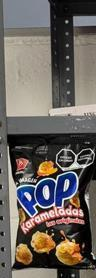

Image: 0_0.jpg, Predicted Label: FritosLimonYSal


Image: 412_444.jpg, Predicted Label: DoritosNachos


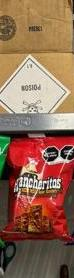

Image: 231_0.jpg, Predicted Label: HutNuts


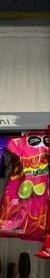

Image: 367_0.jpg, Predicted Label: ChipsFuego


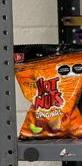

Image: 0_278.jpg, Predicted Label: DoritosNachos


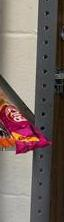

Image: 436_444.jpg, Predicted Label: ChipsFuego


Image: 319_444.jpg, Predicted Label: ChipsFuego


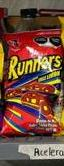

Image: 142.85714285714286_278.jpg, Predicted Label: Rancheritos


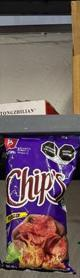

Image: 96_0.jpg, Predicted Label: FritosLimonYSal


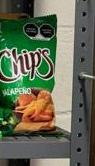

Image: 405_278.jpg, Predicted Label: CheetosTorciditos


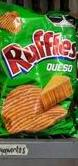

Image: 327_278.jpg, Predicted Label: PopKarameladas


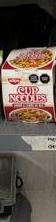

Image: 180_444.jpg, Predicted Label: HutNuts


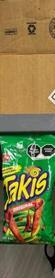

Image: 176_0.jpg, Predicted Label: Runners


Image: 340_444.jpg, Predicted Label: DoritosNachos


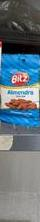

Image: 279_444.jpg, Predicted Label: PopKarameladas


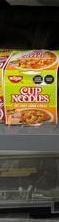

Image: 121_444.jpg, Predicted Label: DoritosNachos


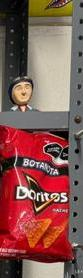

Image: 417_0.jpg, Predicted Label: ChipsJalapeño


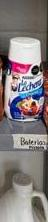

Image: 363.6363636363636_444.jpg, Predicted Label: FritosLimonYSal


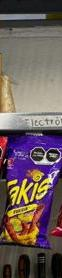

Image: 305_0.jpg, Predicted Label: RufflesQueso


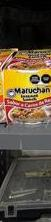

Image: 70_444.jpg, Predicted Label: Rancheritos


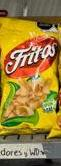

Image: 207_278.jpg, Predicted Label: Churrumais


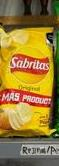

Image: 268_278.jpg, Predicted Label: Churrumais


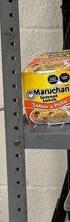

Image: 0_444.jpg, Predicted Label: FritosLimonYSal


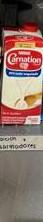

Image: 236_444.jpg, Predicted Label: Rancheritos


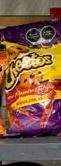

Image: 82_278.jpg, Predicted Label: CheetosFlaminHot


In [22]:
import onnx
import onnxruntime
import os
from PIL import Image
import numpy as np
import torch
from torchvision import transforms
from IPython.display import display

#carga oara evaluación manual de .onnx

#path
onnx_model_path = "/content/drive/MyDrive/ITESM/IA avanzada VII/B2/B2 Reto/modelo13v1.onnx"

# cargar onnx
onnx_model = onnx.load(onnx_model_path)

#onnx runtime session
ort_session = onnxruntime.InferenceSession(onnx_model.SerializeToString())

# transformación de imágenes
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert('RGB')
    image = transform(image)
    image = image.unsqueeze(0)
    return image

# imágenes
image_folder = "/content/drive/MyDrive/ITESM/IA avanzada VII/B2/B2 Reto/recortes"
#image_folder = "/content/drive/MyDrive/ITESM/IA avanzada VII/B2/B2 Reto/recortes_edited"

# evaluación de imágenes existentes
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(image_folder, filename)
        input_image = preprocess_image(image_path)
        ort_inputs = {ort_session.get_inputs()[0].name: input_image.numpy()}
        ort_outputs = ort_session.run(None, ort_inputs)
        predicted_label_index = np.argmax(ort_outputs[0])
        predicted_label = product_pics.classes[predicted_label_index]
        image = Image.open(image_path)
        display(image)
        print(f"Image: {filename}, Predicted Label: {predicted_label}")

